In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
#Loading the NPZ file
data = np.load('C:/Users/zerox/Desktop/ML20019229/Datasets/pathmnist.npz')
print(data.keys()) #Get keys of the dataset

#split data
X_train,X_val,X_test = data['train_images'],data['val_images'],data['test_images']
y_train,y_val,y_test = data['train_labels'].flatten(),data['val_labels'].flatten(),data['test_labels'].flatten()

#Normalizing
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

y_train_one_hot = to_categorical(y_train, num_classes=9)
y_val_one_hot = to_categorical(y_val, num_classes=9)
y_test_one_hot = to_categorical(y_test, num_classes=9)

KeysView(NpzFile 'C:/Users/zerox/Desktop/ML20019229/Datasets/pathmnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...)


In [3]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9, activation='softmax')
])

Epoch 1/10
2813/2813 [==============================] - 15s 5ms/step - loss: 1.1063 - accuracy: 0.5851 - val_loss: 0.8004 - val_accuracy: 0.6979
Epoch 2/10
2813/2813 [==============================] - 14s 5ms/step - loss: 0.7568 - accuracy: 0.7213 - val_loss: 0.7205 - val_accuracy: 0.7276
Epoch 3/10
2813/2813 [==============================] - 15s 5ms/step - loss: 0.6545 - accuracy: 0.7583 - val_loss: 0.5549 - val_accuracy: 0.7949
Epoch 4/10
2813/2813 [==============================] - 15s 5ms/step - loss: 0.5824 - accuracy: 0.7860 - val_loss: 0.5237 - val_accuracy: 0.8103
Epoch 5/10
2813/2813 [==============================] - 15s 5ms/step - loss: 0.5249 - accuracy: 0.8065 - val_loss: 0.4885 - val_accuracy: 0.8235
Epoch 6/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4782 - accuracy: 0.8255 - val_loss: 0.4948 - val_accuracy: 0.8090
Epoch 7/10
2813/2813 [==============================] - 13s 5ms/step - loss: 0.4403 - accuracy: 0.8406 - val_loss: 0.4248 - val_ac

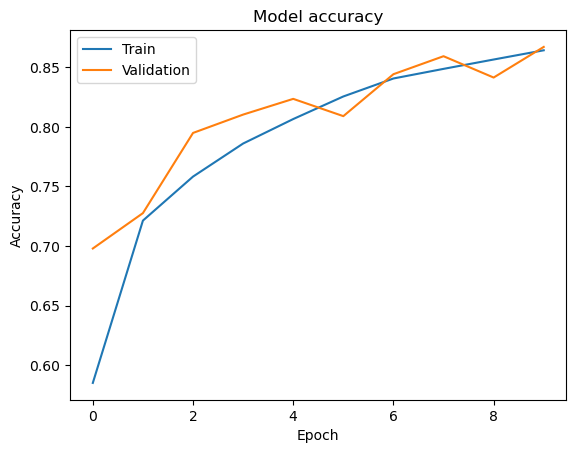

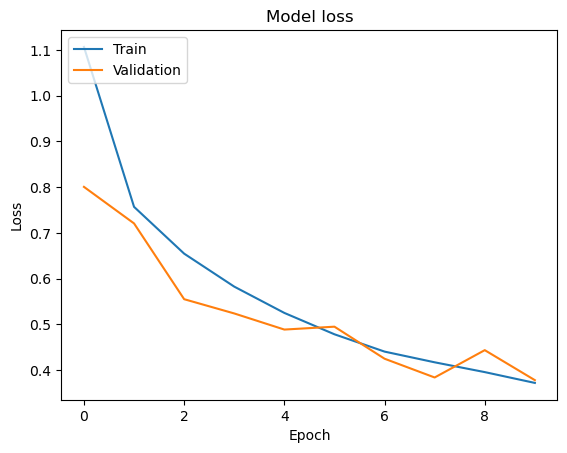

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=10, 
                    validation_data=(X_val, y_val_one_hot))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test,  y_test_one_hot, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()